In [1]:
import scipy.integrate as integrate
import scipy.optimize as optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

data = pd.read_csv('C:\\Users\\marlo\\OneDrive - Universidad de los andes\\Documentos\\202320\\Laboratorio intermedio\\2. Doble rendija\\Laser\\Doble rendija-Laser.csv',sep=';')
data_z = data['m'].to_numpy()
data_I = data['V'].to_numpy()

def integral(f_r, f_i, a, b):
    real = integrate.quad(f_r, a, b)
    im = integrate.quad(f_i, a, b)
    return complex(real[0], im[0])

# Parametros
a= 0.0001
x= 0
d= 0.000457
D1= 0.5
D2= 0.5

In [3]:
def f_f(z,lambda_g,b,c):
    I=[]
    for i in range(len(z)):
    # Intensidad
        di_real= lambda y: np.cos(np.pi/(D1*lambda_g)*(x-y)**2 + np.pi/(D2*lambda_g)*(z[i]-y)**2)
        di_img= lambda y: np.sin(np.pi/(D1*lambda_g)*(x-y)**2 + np.pi/(D2*lambda_g)*(z[i]-y)**2)
    
    # Intensidad Rendija izquierda
        i_izq= np.exp(2*np.pi*1j*(D1+D2)/lambda_g)*integral(di_real, di_img,-d/2-a/2, -d/2+a/2)
    
    # Intensidad Rendija derecha
        i_der= np.exp(2*np.pi*1j*(D1+D2)/lambda_g)*integral(di_real, di_img, d/2-a/2, d/2+a/2)
        I.append(abs(i_der + i_izq)**2)
    return np.array(I)*b+c

def f_fr(z,lambda_g,b,c):
    return b*(np.sin(np.pi*a/lambda_g*np.sin(z))/(np.pi*a/lambda_g*np.sin(z)))**2*np.cos(np.pi/lambda_g*d*np.sin(z))**2+c

In [7]:
guess_0=[630*10**(-9),10**(8),0.5]
parametros_f, covarianza_f = optimize.curve_fit(f_f, data_z, data_I, p0=guess_0)
incertidumbre = np.sqrt(np.diag(covarianza_f))
print(parametros_f) 
print(incertidumbre) #El primer elemento corresponde a la longitud de onda

[6.71269790e-07 1.02638310e+08 3.96034988e-01]
[1.47962269e-09 1.29377796e+06 1.85326442e-02]


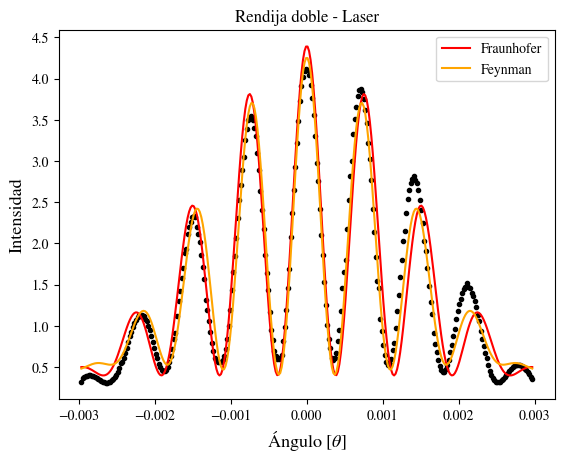

In [5]:
plt.figure()
plt.xlabel(r'Ángulo $[\theta]$', fontsize=13, color='black')
plt.ylabel('Intensidad', fontsize=13, color='black')
plt.title('Rendija doble - Laser')
plt.tick_params(axis='both', colors='black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

plt.plot(data_z,f_fr(data_z,350*10**(-9),4,parametros_f[2]),label='Fraunhofer',c='red')
plt.plot(data_z,f_f(data_z,parametros_f[0],parametros_f[1],parametros_f[2]),label='Feynman',c='orange')
plt.scatter(data_z,data_I, c='black', marker='.')
plt.legend()